In [21]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from Dataset import Dataset, ELM, device
from torch.utils.data import DataLoader
torch.set_default_dtype(torch.float64)

In [22]:
x_data = np.float64(np.linspace(-15, 15, 2000))
# y_data = np.float64(np.sin(x_data) / x_data)
y_data = np.float64(np.sin(x_data) / x_data + np.random.normal(0, 0.1, 2000))

In [23]:
dataset = Dataset(x_data, y_data)

intersize, testsize = 50, 60
interset, trainset, testset = torch.utils.data.random_split(dataset, [intersize, len(dataset)-intersize-testsize, testsize], generator=torch.Generator().manual_seed(42)) # 0.1=3000

trainloader = DataLoader(trainset, batch_size=512, shuffle=True)
testloader = DataLoader(testset, batch_size=512, shuffle=False)

activation = nn.Sigmoid()

In [24]:
# model = ELM(1, intersize, 1).to(device)

# V = activation(model.fc1.bias.data.reshape(-1, 1) + model.fc1.weight.data @ interset[:][0].reshape(1, -1).to(device))
# H = torch.concatenate([torch.ones(1, len(interset)).to(device), V.to(device)], dim=0).T
# T = interset[:][1].reshape(1, -1).T.to(device)
# W2 = torch.linalg.pinv(H) @ T.reshape(1, -1, 1)
# model.fc2.bias.data, model.fc2.weight.data = W2[0][0], W2[0][1:].T

In [25]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
max_train_error = []
min_train_error = []
max_test_error = []
min_test_error = []
num_neurons = 200
a = [5, 10, 50, 100, 500, 1000]
for j in a:
    print(j)
    train_error = []
    test_error = []
    for i in range(10):
        model = ELM(1, j, 1).to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=2e-10)
        intersize = j
        interset, trainset, testset = torch.utils.data.random_split(dataset, [intersize, len(dataset)-intersize-testsize, testsize], generator=torch.Generator().manual_seed(42))
        trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
        testloader = DataLoader(testset, batch_size=128, shuffle=False)
        V = activation(model.fc1.bias.data.reshape(-1, 1) + model.fc1.weight.data @ interset[:][0].reshape(1, -1).to(device))
        H = torch.concatenate([torch.ones(1, len(interset)).to(device), V.to(device)], dim=0).T
        T = interset[:][1].reshape(1, -1).T.to(device)
        # P = torch.linalg.inv(H.T @ H + 1e-3*torch.eye(H.shape[1]).to(device))
        # W2 = P @ H.T @ T.reshape(1, -1, 1)
        W2 = torch.linalg.pinv(H) @ T.reshape(1, -1, 1)
        model.fc2.bias.data, model.fc2.weight.data = W2[0][0], W2[0][1:].T
        num_epochs = 100
        model.train()
        for epoch in range(num_epochs):
            for x, y in trainloader:
                optimizer.zero_grad()
                x, y = x.reshape(-1, 1).to(device), y.reshape(-1, 1).to(device)
                preds = model(x).to(device)
                loss = criterion(preds, y)
                loss.backward()
                optimizer.step()
        train_error.append((model(trainset[:][0].clone().detach().reshape(-1, 1).to(device))-trainset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean())
        test_error.append((model(testset[:][0].clone().detach().reshape(-1, 1).to(device))-testset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean())
    max_train_error.append(max(train_error).item())
    min_train_error.append(min(train_error).item())
    max_test_error.append(max(test_error).item())
    min_test_error.append(min(test_error).item())
# ax[0].plot([5*i+5 for i in range(num_neurons)], max_train_error, 'r', label='Błąd maksymalny')
# ax[0].plot([5*i+5 for i in range(num_neurons)], min_train_error, 'b', label='Błąd minimalny')
# ax[0].set_ylabel('Błąd średniokwadratowy zbioru uczącego')
# ax[0].set_xlabel('Liczba neuronów')
# ax[0].set_yscale('log')
# ax[0].grid()
# ax[0].legend(loc='upper right')
# ax[1].plot([5*i+5 for i in range(num_neurons)], max_test_error, 'r', label='Błąd maksymalny')
# ax[1].plot([5*i+5 for i in range(num_neurons)], min_test_error, 'b', label='Błąd minimalny')
# ax[1].set_ylabel('Błąd średniokwadratowy zbioru weryfikującego')
# ax[1].set_xlabel('Liczba neuronów')
# ax[1].set_yscale('log')
# ax[1].grid()
# ax[1].legend(loc='upper right')
# plt.show()
from decimal import Decimal
for i in min_test_error:
    print(f'{Decimal(i):.2e}', end=' & ')

5
10
50
100
500
1000
2.54e-1 & 3.33e+6 & 1.39e+0 & 2.09e-1 & 1.17e-2 & 1.06e-2 & 

In [26]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-10)

Epoch: [1/1000], loss: 0.009512
Epoch: [2/1000], loss: 0.020170
Epoch: [3/1000], loss: 0.013003
Epoch: [4/1000], loss: 0.009140
Epoch: [5/1000], loss: 0.016700
Epoch: [6/1000], loss: 0.015977
Epoch: [7/1000], loss: 0.012011
Epoch: [8/1000], loss: 0.011894
Epoch: [9/1000], loss: 0.010527
Epoch: [10/1000], loss: 0.011296
Epoch: [11/1000], loss: 0.011208
Epoch: [12/1000], loss: 0.009992
Epoch: [13/1000], loss: 0.010068
Epoch: [14/1000], loss: 0.010874
Epoch: [15/1000], loss: 0.007871
Epoch: [16/1000], loss: 0.009942
Epoch: [17/1000], loss: 0.013089
Epoch: [18/1000], loss: 0.015295
Epoch: [19/1000], loss: 0.009487
Epoch: [20/1000], loss: 0.010002
Epoch: [21/1000], loss: 0.013659
Epoch: [22/1000], loss: 0.011748
Epoch: [23/1000], loss: 0.010450
Epoch: [24/1000], loss: 0.008650
Epoch: [25/1000], loss: 0.009845
Epoch: [26/1000], loss: 0.008668
Epoch: [27/1000], loss: 0.008574
Epoch: [28/1000], loss: 0.014623
Epoch: [29/1000], loss: 0.011439
Epoch: [30/1000], loss: 0.011111
Epoch: [31/1000], l

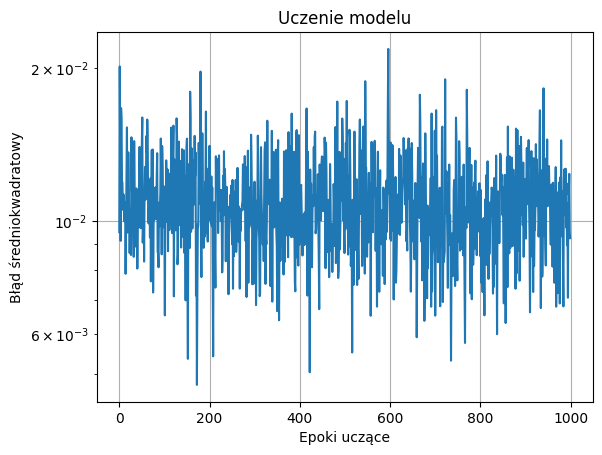

In [27]:
num_epochs = 1000
all_losses = []
model.train()

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.reshape(-1, 1).to(device), y.reshape(-1, 1).to(device)
        preds = model(x).to(device)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
    all_losses.append(loss.item())
    print(f'Epoch: [{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

plt.plot(all_losses)
plt.yscale('log')
plt.title('Uczenie modelu')
plt.xlabel('Epoki uczące')
plt.ylabel('Błąd średniokwadratowy')
plt.grid()
plt.show()

Train error: 0.011104281031936782
Test error: 0.012135691587969484


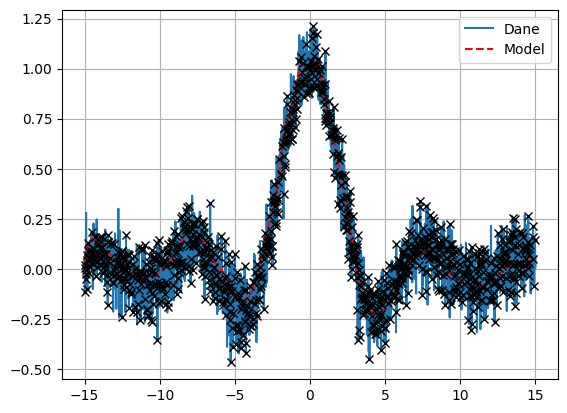

In [28]:
print(f'Train error: {(model(trainset[:][0].clone().detach().reshape(-1, 1).to(device))-trainset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean()}')
print(f'Test error: {(model(testset[:][0].clone().detach().reshape(-1, 1).to(device))-testset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean()}')
plt.plot(x_data, y_data)
plt.plot(x_data, model(torch.tensor(x_data).reshape(-1, 1).to(device)).cpu().detach().numpy(), 'r--')
plt.plot(interset[:][0], interset[:][1], 'kx')
plt.legend(['Dane', 'Model'], loc='upper right')
plt.grid()
plt.show()

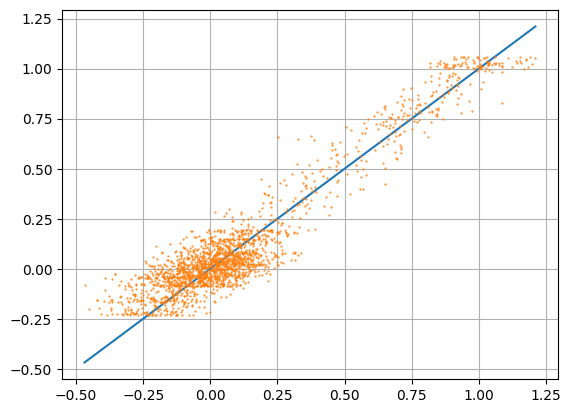

In [29]:
plt.plot([np.min(y_data), np.max(y_data)], [np.min(y_data), np.max(y_data)])
plt.plot(y_data, model(torch.tensor(x_data).reshape(-1, 1).to(device)).cpu().detach().numpy(), '.', markersize=1)
plt.grid()
plt.show()